Exercise 1 A 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn import linear_model
from sklearn import metrics

pd.set_option('display.max_columns', None)

Getting each file and make it dataframe

In [ ]:
def parse(x):
  try:
      return float(x)
  except:
      return x

In [ ]:
def generate_df_from_file(file_name,df_cols,encoding='utf-8',split_by='|',selected_type=object):
  print('df is created for file {}'.format(file_name))
  return pd.read_csv(file_name,delimiter=split_by,names=df_cols,encoding=encoding)

item_columns  = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
data_df_before_filter = generate_df_from_file('u.data',['user id','movie id','rating','timestamp'],split_by='\t')
items_df = generate_df_from_file('u.item',item_columns,encoding="ISO-8859-1")


df is created for file u.data
df is created for file u.item


Let's filter the data so it will keep only movies that appears in more than 0.001% of the rating records 

In [ ]:
def filter_data(data_df_before_filter):  
  items_freequency = data_df_before_filter.groupby(['movie id']).count()
  rated_items = items_freequency[items_freequency['user id'] > int(0.0001*len(data_df_before_filter))]
  data_df = data_df_before_filter[data_df_before_filter['movie id'].isin(rated_items.index)]
  return data_df


data_df = filter_data(data_df_before_filter)

Calculate average rating per movie


In [ ]:
def get_movies_avg_by_data(df_of_data,rating_col_name = 'rating'):
  res = pd.DataFrame(df_of_data.groupby(['movie id'])[rating_col_name].mean()).sort_values(by=[rating_col_name],ascending=False)
  res.columns=['avg rating']
  return res.merge(items_df, on='movie id', how='inner').iloc[:,:3]
  
avg_movie_rating_df = get_movies_avg_by_data(data_df)
avg_movie_rating_df

,movie id,avg rating,movie title
0,408,4.491071,"Close Shave, A (1995)"
1,318,4.466443,Schindler's List (1993)
2,169,4.466102,"Wrong Trousers, The (1993)"
3,483,4.456790,Casablanca (1942)
4,114,4.447761,Wallace & Gromit: The Best of Aardman Animatio...
...,...,...,...
1114,1274,1.727273,Robocop 3 (1993)
1115,758,1.714286,Lawnmower Man 2: Beyond Cyberspace (1996)
1116,440,1.642857,Amityville II: The Possession (1982)
1117,669,1.615385,Body Parts (1991)


Extracting the top 3 rated movies

In [ ]:
top_rated_movies = avg_movie_rating_df.iloc[:3,:]
top_rated_movies.merge(items_df,on='movie id')

,movie id,avg rating,movie title_x,movie title_y,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,408,4.491071,"Close Shave, A (1995)","Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,318,4.466443,Schindler's List (1993),Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,169,4.466102,"Wrong Trousers, The (1993)","Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Distribution of avg. rating

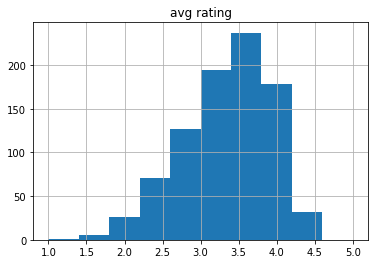

In [ ]:
def hist_for_avg(df):
  res = pd.DataFrame(columns=['avg rating','movie ids'],data=df.groupby(['avg rating']))
  res.hist(range=(1,5))

hist_for_avg(avg_movie_rating_df)

**Exercise 1B - For men**

In [ ]:
users_columns = ['user id' , 'age' , 'gender' , 'occupation' , 'zip code']
users_df = generate_df_from_file('u.user',users_columns,encoding="ISO-8859-1")

df is created for file u.user


**Get mens df** 

In [ ]:
men_users = users_df[users_df['gender'] == 'M']
men_users_ids = men_users['user id'].tolist()
men_df = data_df[data_df['user id'].isin(men_users_ids)].sort_values(by='user id')

In [ ]:
avg_movie_rating_df_for_men = get_movies_avg_by_data(men_df)
avg_movie_rating_df_for_men.iloc[:3,:].merge(items_df,on='movie id')

,movie id,avg rating,movie title_x,movie title_y,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,483,4.473404,Casablanca (1942),Casablanca (1942),01-Jan-1942,NaN,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,169,4.472527,"Wrong Trousers, The (1993)","Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,408,4.462366,"Close Shave, A (1995)","Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


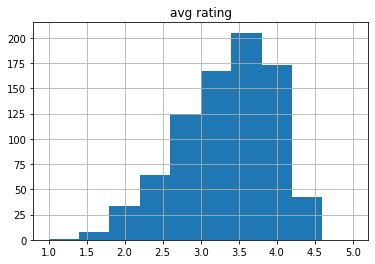

In [ ]:
hist_for_avg(avg_movie_rating_df_for_men)

**Get women df**

In [ ]:
women_users = users_df[users_df['gender'] == 'F']
women_users_ids = women_users['user id'].tolist()
women_df = data_df[data_df['user id'].isin(women_users_ids)].sort_values(by='user id')

Top 3 rated movies by women

In [ ]:
avg_movie_rating_df_for_women = get_movies_avg_by_data(women_df)
avg_movie_rating_df_for_women.iloc[:3,:].merge(items_df,on='movie id')

,movie id,avg rating,movie title_x,movie title_y,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1451,5.000000,Foreign Correspondent (1940),Foreign Correspondent (1940),01-Jan-1940,NaN,http://us.imdb.com/M/title-exact?Foreign%20Cor...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,883,5.000000,Telling Lies in America (1997),Telling Lies in America (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Telling+Lies+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,318,4.632911,Schindler's List (1993),Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


distribution of avg rating by women

distribution of avg rating


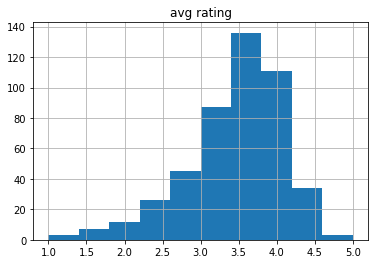

In [ ]:
print('distribution of avg rating')
hist_for_avg(avg_movie_rating_df_for_women)

Top 3 movies with the most mean rating difference between men and women sectors 

In [ ]:
avg_movie_rating_df_for_women = avg_movie_rating_df_for_women.rename(columns={"avg rating": "women avg rating"})
avg_movie_rating_df_for_men = avg_movie_rating_df_for_men.rename(columns={"avg rating": "men avg rating"})
gender_avg_distance_df = avg_movie_rating_df_for_women.merge(avg_movie_rating_df_for_men[['movie id','men avg rating']],on='movie id')
gender_avg_distance_df['avg difference'] = np.abs(gender_avg_distance_df['women avg rating'] - gender_avg_distance_df['men avg rating'])
gender_avg_distance_df.head(3).merge(items_df,on='movie id').sort_values(by='avg difference',ascending=False)


,movie id,women avg rating,movie title_x,men avg rating,avg difference,movie title_y,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,883,5.000000,Telling Lies in America (1997),3.083333,1.916667,Telling Lies in America (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Telling+Lies+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
0,1451,5.000000,Foreign Correspondent (1940),3.785714,1.214286,Foreign Correspondent (1940),01-Jan-1940,NaN,http://us.imdb.com/M/title-exact?Foreign%20Cor...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,318,4.632911,Schindler's List (1993),4.406393,0.226519,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


***Task 1C***

Now lets write function that generates histogram to any demographic df

Getting the top and the worst rated movies are done by taking the top 10 percents of the top and worst movies of the most rated movies (rated by more than 0.05 percents of the sector)

In [ ]:
import numpy as np

def genre_histogram_by_demography(demography_df,demography_name='specific set of users'):
  movies_and_users_info = demography_df.merge(items_df,on='movie id',how='inner')
  most_rated_movies = movies_and_users_info[movies_and_users_info['movie id'].map(movies_and_users_info['movie id'].value_counts()) > 0.0005 * len(movies_and_users_info)]
  # look at each movie data and get the top rated movies and worse ones.
  rating_sorted_descending = most_rated_movies.groupby(['movie id'])['rating'].mean().reset_index(name='rating').sort_values(by='rating',ascending=False)
  top_rated_movies = np.split(rating_sorted_descending,[int(0.1*len(rating_sorted_descending))])
  best_movies = top_rated_movies[0]

  rating_sorted_ascending = rating_sorted_descending.sort_values(by='rating',ascending=True)
  least_rated_movies = np.split(rating_sorted_ascending,[int(0.1*len(rating_sorted_ascending))])
  worst_movies = least_rated_movies[0]

  # get the genres for each movie
  worst_movies_info = worst_movies.join(items_df.set_index('movie id'))
  best_movies_info = best_movies.join(items_df.set_index('movie id'))


  genres = items_df.columns[5:]
  cols = ['how many rated one of the movies of specific genre higher','how many rated one of the movies of specific genre lower']
  genres_preferations_by_count = pd.DataFrame(columns=cols)

  for genre in genres:
    beloved_genre_movies_count = len(best_movies_info[best_movies_info[genre]==1])
    unliked_genre_movies_count = len(worst_movies_info[worst_movies_info[genre]==1])
    genre_preferation_record = pd.DataFrame(data={cols[0]:beloved_genre_movies_count,cols[1]:unliked_genre_movies_count},index=[genre])
    genres_preferations_by_count = pd.concat([genres_preferations_by_count,genre_preferation_record])


  plot_title = 'genre preferations of sector : {}'.format(demography_name)
  plot = genres_preferations_by_count.plot(kind='bar', title=plot_title,figsize=(18,9),color=['green','red'])
  plot.set_ylabel("count")

Apply the above function for different sectors

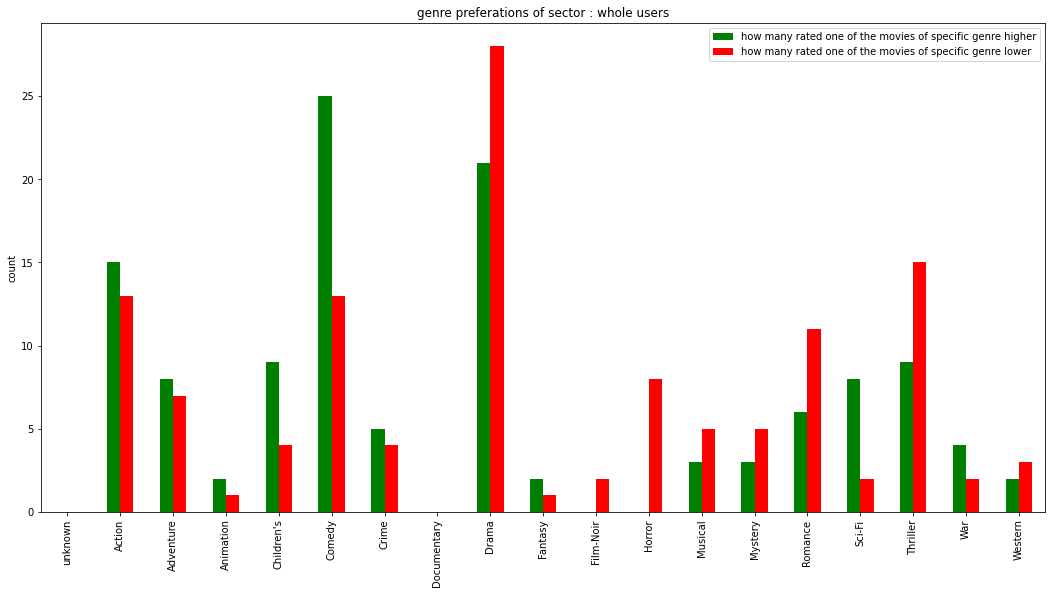

In [ ]:
genre_histogram_by_demography(data_df,"whole users")

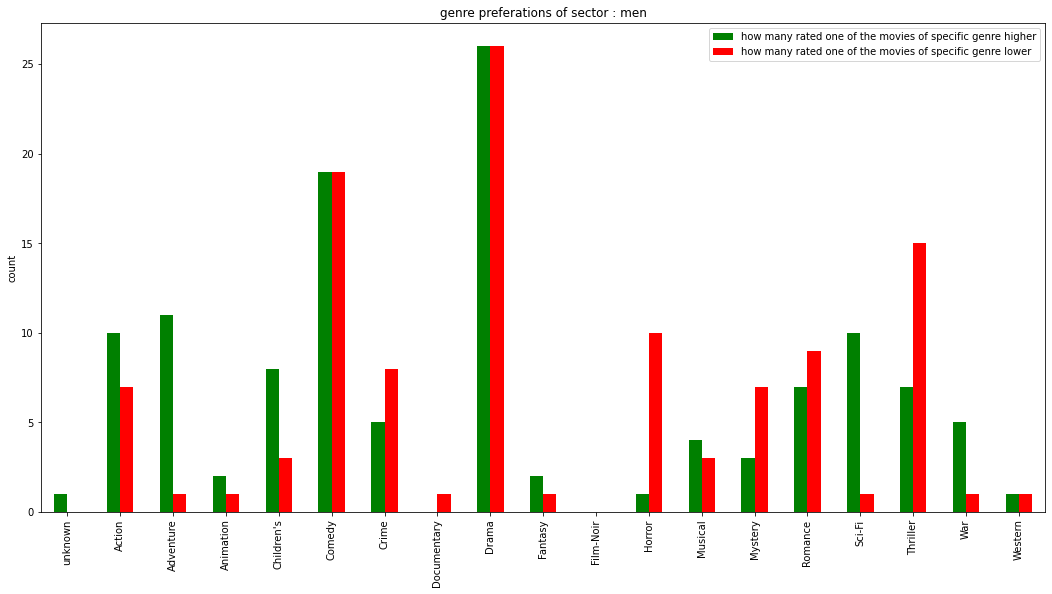

In [ ]:
genre_histogram_by_demography(men_df,"men")

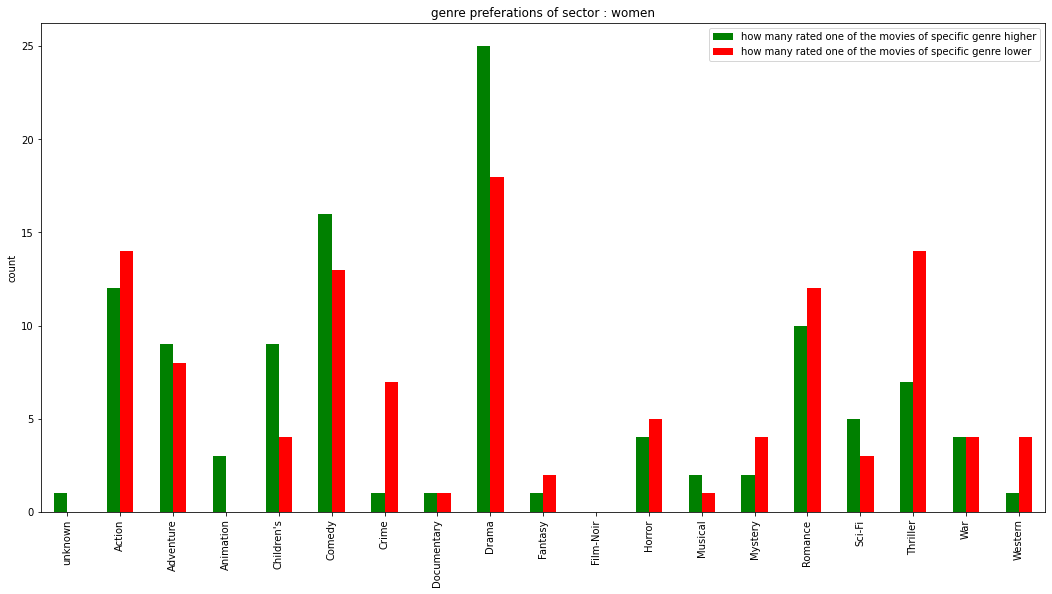

In [ ]:
genre_histogram_by_demography(women_df,"women")

Let's explore other sectors

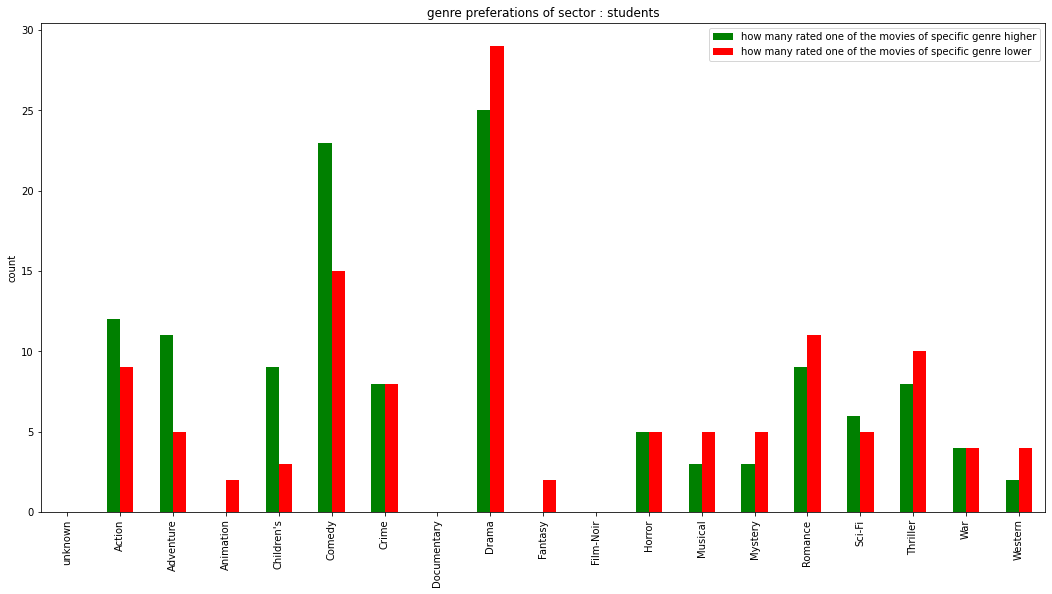

In [ ]:
students_users = users_df[users_df['occupation'] == 'student']
students_users_ids = students_users['user id'].tolist()
student_df = data_df[data_df['user id'].isin(students_users_ids)].sort_values(by='user id')
genre_histogram_by_demography(student_df,"students")

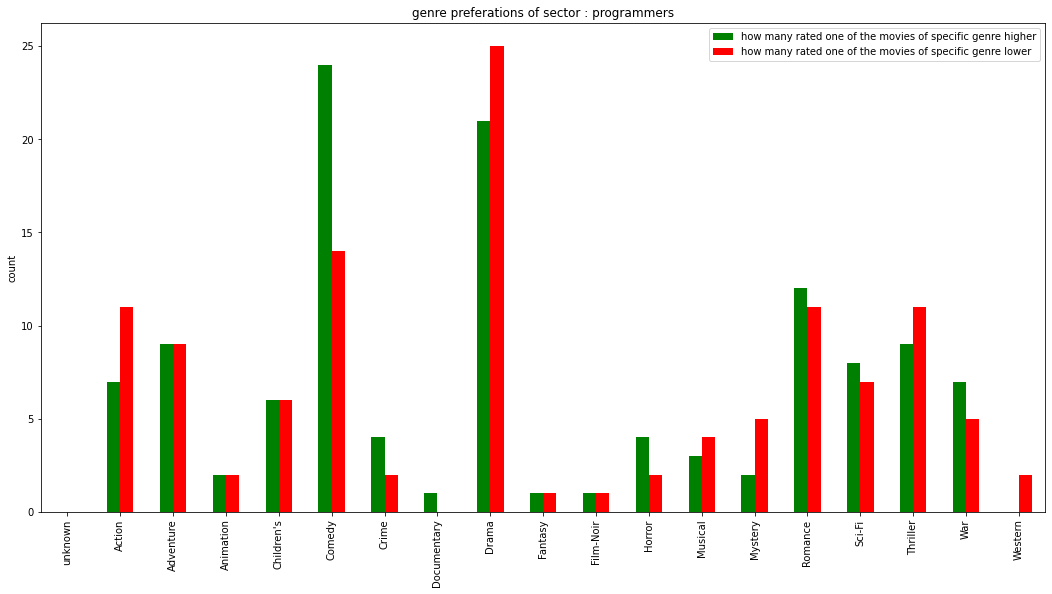

In [ ]:
programmers_users = users_df[users_df['occupation'] == 'programmer']
programmers_users_ids = programmers_users['user id'].tolist()
programmers_df = data_df[data_df['user id'].isin(programmers_users_ids)].sort_values(by='user id')
genre_histogram_by_demography(programmers_df,"programmers")

The diffrence between the populations is:
* The student sector are ambivallent to differnet genres, while other sectors  have a clear opinion of some genres.
* Both men and women like to watch children's movies.
* Only women like to watch drama movies.

Things that different populations have in common:
* Most of the human from different sectors don't like to watch thriller movies, but they like to watch sci-fi movies.


**TASK 1D**

We will take the top 10% rated movies, we will sort them and take the ones who got the highest average rating

In [ ]:
movie_rating_count = data_df.groupby('movie id').size().reset_index(name='counts').sort_values(by='counts',ascending=False)
top_rated = movie_rating_count.head(int(len(movie_rating_count)/10))
top_rated_with_avg = top_rated.merge(avg_movie_rating_df,on='movie id',how='inner').sort_values(by='avg rating',ascending=False)
print(top_rated_movies)

   movie id  avg rating                 movie title
0       408    4.491071       Close Shave, A (1995)
1       318    4.466443     Schindler's List (1993)
2       169    4.466102  Wrong Trousers, The (1993)


In [ ]:
train_set_before_filter = generate_df_from_file('u1.base',['user id','movie id','rating','timestamp'],split_by='\t')
train_set =  filter_data(train_set_before_filter)
test_set = generate_df_from_file('u1.test',['user id','movie id','rating','timestamp'],split_by='\t')

df is created for file u1.base
df is created for file u1.test


**TASK 2A - recommendation model base on 1A**

MAE:

In [ ]:
def predict_movie_rating_by_sector(sector_df):
  sector_test_df = test_set[test_set['user id'].isin(sector_df['user id'].tolist())]
  sector_train_df = train_set[train_set['user id'].isin(sector_df['user id'].tolist())]
  avg_rating_for_train_movies = get_movies_avg_by_data(sector_train_df)
  predicted_reduced_test_set = sector_test_df.merge(avg_rating_for_train_movies,on='movie id').rename(columns={"avg rating": "predicted rating"})
  mae = metrics.mean_absolute_error(predicted_reduced_test_set['rating'],predicted_reduced_test_set['predicted rating'])
  return "mae = {}".format(mae)


Apply this function in order to predict ratings

In [ ]:
predict_movie_rating_by_sector(data_df)

'mae = 0.8188134573939645'

**TASK 2B**

Calculate recommenations and precision and recall for each method

In [ ]:
def recomend(sector_df ,should_random=False):
  users_ids = sector_df['user id'].unique()
  avg_rating_for_train_movies = get_movies_avg_by_data(sector_df)
  recommendations = dict()
  for user_id in users_ids:
    seen_movies = train_set[train_set['user id'] == user_id]['movie id'].tolist()
    not_seen_movies_with_avgs = train_set[~train_set['user id'].isin(seen_movies)].merge(avg_rating_for_train_movies,on='movie id')
    if should_random:
      recommendations_for_user = not_seen_movies_with_avgs.sample(n=20).set_index('movie id').index
    else:
      recommendations_for_user = not_seen_movies_with_avgs.sort_values(by='avg rating').head(20).set_index('movie id').index
    recommendations[user_id] = recommendations_for_user
  return pd.DataFrame(recommendations)


randomized_recommendations = recomend(data_df,should_random=True)
precision_recommendations = recomend(data_df)


In [ ]:
def calculate_precision_and_recall(sector_df , recommendations_df):
  relevant = 0
  selected = 0
  relevant_and_selected = 0
  users_ids = []
  for user_id in recommendations_df.columns:
    if user_id in sector_df['user id'].tolist():
      users_ids.append(user_id)
  for user_id in users_ids:
    movies_seen_test = test_set[test_set['user id'] == user_id]['movie id']
    # print(movies_seen_test)
    relevant += len(movies_seen_test)
    selected += len(recommendations_df.loc[:,user_id])

    # for each selected item
    # print(recommendations_df.loc[:,user_id])
    for movie_id in recommendations_df.loc[:,user_id]:
      # if relevent
      if movie_id in movies_seen_test:
         relevant_and_selected +=1

      
  precision = relevant_and_selected/selected
  recall = relevant_and_selected/relevant
  return precision,recall

In [ ]:
randomized_matrics= calculate_precision_and_recall(data_df,randomized_recommendations)
print('Randomized recommendation results: precision  = {}, recall = {}'.format(randomized_matrics[0],randomized_matrics[1]))
precision_matrics = calculate_precision_and_recall(data_df,precision_recommendations)
print('Precision recommendation results: precision  = {}, recall = {}'.format(precision_matrics[0],precision_matrics[1]))

Randomized recommendation results: precision  = 0.0012725344644750796, recall = 0.0012
Precision recommendation results: precision  = 0.0011664899257688229, recall = 0.0011


We got better results in the prediction based avg rating.

**TASK** 2C

Apply the functions above for men sector

Task 2a for men sector

In [ ]:
predict_movie_rating_by_sector(men_df)

'mae = 0.7969599783506004'

Task 2b for men sector

In [ ]:
men_rand_recom = recomend(men_df ,should_random=True)
print('men rand matric : {}'.format(calculate_precision_and_recall(men_df,men_rand_recom)))
men_prec_recom = recomend(men_df)
print('men prec matric : {}'.format(calculate_precision_and_recall(men_df,men_prec_recom)))

men rand matric : (0.0009701492537313432, 0.0008571240192523241)
men prec matric : (0.0019402985074626865, 0.0017142480385046483)


We got better results when exploring whole population. It happaned because we have more information about the bigger population.

Let's install turicreate for task 3

In [ ]:
!pip install turicreate

     |████████████████████████████████| 91.8MB 40kB/s 
     |████████████████████████████████| 3.4MB 56.6MB/s 
     |████████████████████████████████| 327kB 61.1MB/s 
     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 450kB 55.0MB/s 
     |████████████████████████████████| 3.8MB 58.1MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=f6aa7e8c9162909bf9c7251c323a3564d49015d2dffd3ee93f186dffcbd80d1a
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=bdbee0b31a359c797991ed771c47248a4520f45be1f46a0d2f88e2c0962a0b6e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
 

**TASK 3**

In [ ]:
import turicreate as tc
from sklearn.metrics import mean_absolute_error

#change names for model calculation
train_sf = train_set
test_sf = test_set
test_sf = test_sf.rename(columns={"user id": "user_id", "movie id": "item_id"})
test_sf = tc.SFrame(test_sf)
train_sf = train_sf.drop(columns=['timestamp'])
train_sf = train_set.rename(columns={"user id": "user_id", "movie id": "item_id"})
train_sf = tc.SFrame(train_sf)
backup1 = test_sf['rating']
backup2 = test_sf['rating']
backup3 = test_sf['rating']
backup4 = test_sf['rating']
#matrix factorization
matrix = tc.ranking_factorization_recommender.create(train_sf, user_id='user_id', item_id='item_id', target='rating');
solution_matrix_factorization = matrix.predict(test_sf)
a = mean_absolute_error(backup1, solution_matrix_factorization)

#user to user
user_user = tc.recommender.item_similarity_recommender.create(train_sf, user_id='user_id', item_id='item_id', target='rating', similarity_type='jaccard')
solution_user_to_user = user_user.predict(test_sf)
b = mean_absolute_error(backup2, solution_user_to_user)

#item similarity
item_similarity = tc.recommender.item_similarity_recommender.create(train_sf, user_id='user_id', item_id='item_id', target='rating', similarity_type='cosine')
solution_item_similarity = item_similarity.predict(test_sf)
c = mean_absolute_error(backup3, solution_item_similarity)

#item content
movies = items_df.drop(['movie title', 'video release date', 'IMDb URL', 'release date'], axis=1)
movies = movies.rename(columns={"movie id": "item_id"})
movies['item_id']=movies['item_id'].astype(int)
movies = tc.SFrame(movies)
item_content = tc.item_content_recommender.create(movies, observation_data=train_sf, user_id='user_id', item_id='item_id', target='rating')
solution_item_content = item_content.predict(test_sf)
d = mean_absolute_error(backup4, solution_item_content)

print('{0}  {1}'.format('MAE matrix factorization:', a))
print('{0}  {1}'.format('MAE user to user:', b))
print('{0}  {1}'.format('MAE item similarity:', c))
print('{0}  {1}'.format('MAE item content:', d))

Preparing data set.

Data has 78108 observations with 943 users and 1115 items.

Data prepared in: 0.106017s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 78108 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | Not Viable                               |

| 2       | 1.04167           | Not Viable                               |

| 3       | 0.260417          | Not Viable                               |

| 4       | 0.0651042         | 1.3639                                   |

| 5       | 0.0325521         | 1.67337                                  |

| 6       | 0.016276          | 2.02348                                  |

| 7       | 0.00813802        | 2.12562                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 1.3639                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 116us        | 2.41238           | 1.10922               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 339.371ms    | 1.91758           | 1.0519                | 0.0651042   |

| 2       | 501.089ms    | 1.75842           | 0.975936              | 0.0651042   |

| 3       | 835.779ms    | 1.65627           | 0.951945              | 0.0651042   |

| 4       | 1.01s        | 1.58102           | 0.930954              | 0.0651042   |

| 5       | 1.14s        | 1.50744           | 0.909031              | 0.0651042   |

| 10      | 2.59s        | 1.37804           | 0.867893              | 0.0651042   |

| 25      | 6.27s        | 1.128             | 0.7514                | 0.0651042   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.16324

Final training RMSE: 0.73505

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 78108 observations with 943 users and 1115 items.

Data prepared in: 0.072074s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 24.864ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 26.565ms                            | 0                | 0               |

| 58.256ms                            | 100              | 1115            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.082963s

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 78108 observations with 943 users and 1115 items.

Data prepared in: 0.091823s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 15.834ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 17.43ms                             | 0                | 1               |

| 47.707ms                            | 100              | 1115            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.055805s

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 40)"

Note that increasing the degree of parallelism also increases the memory footprint.

Applying transform:
Class             : AutoVectorizer

Model Fields
------------
Features          : ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Excluded Features : ['item_id']

Column       Type  Interpretation  Transforms   Output Type
-----------  ----  --------------  -----------  -----------
unknown      int   categorical     astype(str)  str        
Action       int   categorical     astype(str)  str        
Adventure    int   categorical     astype(str)  str        
Animation    int   categorical     astype(str)  str        
Children's   int   categorical     astype(str)  str        
Comedy       int   categorical     astype(str)  str        
Crime        int   categorical     astype(str)  str        
Documentary  int   categorical     astype(str)  str        
Drama        int   categorical     astype(str)  str  

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 1682    | 0.059453    | 9.352ms      |

| Done         |         | 100         | 75.911ms     |

+--------------+---------+-------------+--------------+

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 78108 observations with 943 users and 1682 items.

Data prepared in: 0.182453s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.030361s

MAE matrix factorization:  0.9192896721961588
MAE user to user:  3.4899001554713918
MAE item similarity:  3.2589447532955917
MAE item content:  3.3578668684941624


**TASK 4**

install libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as T
import keras
from keras import backend as K
from keras import initializers
from keras.initializers import RandomNormal
from keras.models import Sequential, Model, load_model, save_model
from keras.layers.core import Dense, Lambda, Activation
from keras.layers import Embedding, Input, Dense, merge, Reshape,  Flatten, Dropout
from keras.optimizers import Adagrad, Adam, SGD, RMSprop, Adamax
from keras.regularizers import l2
from keras.layers import Multiply, Concatenate
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from time import time
import multiprocessing as mp
import sys
import math
import argparse
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [ ]:
RATING_DATA_GEN_FILE = 'u_gen.data'
RATINGS_CSV_FILE = 'u_emb.data'
RATINGS_CSV_FILE_NORM = 'u_norm.data'
RATINGS_GEN_CSV_FILE = 'u_genr.data'
MODEL_WEIGHTS_FILE = 'u_emb_weights.h5'
MODEL_WEIGHTS_FILE_CORE = 'u_emb_weights'

The user and item id for embedding should start from 0. Update ids and save to file

In [ ]:
ratings = pd.read_csv('u.data', 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])
max_userid = ratings['userid'].drop_duplicates().max()
max_movieid = ratings['movieid'].drop_duplicates().max()
ratings['user_emb_id'] = ratings['userid'] - 1
ratings['movie_emb_id'] = ratings['movieid'] - 1
print(str(len(ratings))+' ratings loaded')

100000 ratings loaded


In [ ]:
ratings.to_csv('u_emb.data', 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['userid', 'movieid', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id'])
print('Saved to u_emb.data')
#files.download(RATINGS_CSV_FILE)

Saved to u_emb.data


In [ ]:
max_userid = ratings['userid'].drop_duplicates().max()
max_movieid = ratings['movieid'].drop_duplicates().max()
ratings['user_emb_id'] = ratings['userid'] - 1
ratings['movie_emb_id'] = ratings['movieid'] - 1
ratings['rating_norm'] = ratings['rating']  * 0.2
print(str(len(ratings))+' ratings loaded')
ratings.to_csv(RATINGS_CSV_FILE_NORM, 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['userid', 'movieid', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id','rating_norm'])
print('Saved to '+RATINGS_CSV_FILE_NORM)

100000 ratings loaded
Saved to u_norm.data


Load train rating file

In [ ]:
#ratings are normalized between 0 to 1
ratings_norm = pd.read_csv(RATINGS_CSV_FILE_NORM, 
                       sep='\t', 
                       encoding='latin-1', 
                       usecols=['userid', 'movieid', 'user_emb_id', 'movie_emb_id', 'rating','rating_norm'])
max_userid = ratings_norm['userid'].drop_duplicates().max()
max_movieid = ratings_norm['movieid'].drop_duplicates().max()
print(str(len(ratings)), 'ratings loaded.')
print('users '+str(max_userid)+' items '+str(max_movieid))

100000 ratings loaded.
users 943 items 1682


Prepare inputs to model

In [ ]:
Users = ratings['user_emb_id'].values
Movies = ratings['movie_emb_id'].values
Ratings = ratings['rating'].values
Ratings_norm = ratings_norm['rating_norm']

Saved to u_emb.data

In [ ]:
max_userid = ratings['userid'].drop_duplicates().max()
max_movieid = ratings['movieid'].drop_duplicates().max()
ratings['user_emb_id'] = ratings['userid'] - 1
ratings['movie_emb_id'] = ratings['movieid'] - 1
ratings['rating_norm'] = ratings['rating']  * 0.2
print(str(len(ratings))+' ratings loaded')
ratings.to_csv('norm', 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['userid', 'movieid', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id','rating_norm'])
print('Saved to '+'norm')

100000 ratings loaded
Saved to norm


Load train rating file

In [ ]:
#ratings are normalized between 0 to 1
ratings_norm = pd.read_csv('norm', 
                       sep='\t', 
                       encoding='latin-1', 
                       usecols=['userid', 'movieid', 'user_emb_id', 'movie_emb_id', 'rating','rating_norm'])
max_userid = ratings_norm['userid'].drop_duplicates().max()
max_movieid = ratings_norm['movieid'].drop_duplicates().max()
print(str(len(ratings)), 'ratings loaded.')
print('users '+str(max_userid)+' items '+str(max_movieid))

100000 ratings loaded.
users 943 items 1682


**Define matrix factorization model**

In [ ]:
def get_model(num_users, num_items, latent_dim):
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    MF_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim, name = 'user_embedding', input_length=1)
    MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim, name = 'item_embedding', input_length=1)   
    
    # Crucial to flatten an embedding vector!
    user_latent = Flatten()(MF_Embedding_User(user_input))
    item_latent = Flatten()(MF_Embedding_Item(item_input))
    
    # Element-wise product of user and item embeddings
    #prediction = merge([user_latent, item_latent], mode = 'dot')
    prediction = keras.layers.dot([user_latent,item_latent], axes=1,normalize=False)
    
    
    model = Model(input=[user_input, item_input], output=prediction)

    return model


**Define generalized matrix factorization model**

In [ ]:
def get_gmf_model(num_users, num_items, latent_dim,do):
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    MF_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim, name = 'user_embedding', input_length=1)
    MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim, name = 'item_embedding', input_length=1)   
    
    # Crucial to flatten an embedding vector!
    user_latent = Flatten()(MF_Embedding_User(user_input))
    item_latent = Flatten()(MF_Embedding_Item(item_input))
    
    # Element-wise product of user and item embeddings
    hidden1 = Multiply()([user_latent, item_latent])
    drop = Dropout(do)(hidden1)
    prediction = Dense(1, activation=activation_param, kernel_initializer='lecun_uniform', name = 'prediction')(drop)
    
    
    model = Model(input=[user_input, item_input], output=prediction)
    
    print("gmf model: ")
    model.summary()

    return model

**Define neural collaborative filtering model**

In [ ]:
def get_ncf_model(num_users, num_items, latent_dim,hidden_dim,do, activation_param):
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    MF_Embedding_User = Embedding(input_dim = num_users, output_dim = latent_dim, name = 'user_embedding', input_length=1)
    MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = latent_dim, name = 'item_embedding', input_length=1)   
    
    # Crucial to flatten an embedding vector!
    user_latent = Flatten()(MF_Embedding_User(user_input))
    item_latent = Flatten()(MF_Embedding_Item(item_input))
    
    # Element-wise product of user and item embeddings
    conc = Concatenate()([user_latent, item_latent])
    drop = Dropout(0.5)(conc)
    hid1 = Dense(hidden_dim, activation=activation_param)(conc)
    drop2  = Dropout(do)(hid1)
    prediction = Dense(1, activation=activation_param, kernel_initializer='lecun_uniform', name = 'prediction')(drop2)
    
    
    model = Model(input=[user_input, item_input], output=prediction)
    print("ncf model")
    model.summary()

    return model

**~Neural Collaborative Filtering - Implementation with Keras**


Define embedding size and compile model for 1 hidden dimension

In [ ]:
K_LATENT = 20
hidden_dim = 1
do = 0.5
NCF_model = get_ncf_model(max_userid,max_movieid,K_LATENT,hidden_dim,do,'relu')
NCF_model.compile(loss='mse',optimizer=Adamax(),metrics=['mae'])

ncf model
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 20)        18860       user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 20)        33640       item_input[0][0]                 
__________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [ ]:
callbacks_ncf = [EarlyStopping('val_loss', patience=5), 
             ModelCheckpoint(MODEL_WEIGHTS_FILE_CORE+'_ncf_'+str(do)+'_'+str(K_LATENT)+'_'+str(hidden_dim)+'.h5', save_best_only=True)]
history_history_ncf = NCF_model.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, callbacks=callbacks_ncf, batch_size = 32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 5s 53us/step - loss: 3.4844 - mae: 1.4715 - val_loss: 1.1222 - val_mae: 0.8809
Epoch 2/100
90000/90000 [==============================] - 5s 54us/step - loss: 1.1786 - mae: 0.8884 - val_loss: 1.1138 - val_mae: 0.8758
Epoch 3/100
90000/90000 [==============================] - 5s 51us/step - loss: 1.1683 - mae: 0.8857 - val_loss: 1.1100 - val_mae: 0.8736
Epoch 4/100
90000/90000 [==============================] - 4s 50us/step - loss: 1.1667 - mae: 0.8854 - val_loss: 1.0973 - val_mae: 0.8639
Epoch 5/100
90000/90000 [==============================] - 4s 50us/step - loss: 1.1616 - mae: 0.8820 - val_loss: 1.1011 - val_mae: 0.8668
Epoch 6/100
90000/90000 [==============================] - 4s 50us/step - loss: 1.1619 - mae: 0.8823 - val_loss: 1.0984 - val_mae: 0.8659
Epoch 7/100
90000/90000 [==============================] - 5s 50us/step - loss: 1.1614 - mae: 0.8821 - val_loss: 1.1078 - 

**Option 1 for nerual collaborative**

In [ ]:
K_LATENT = 20
hidden_dim = 10
do = 0.5
NCF_model_1 = get_ncf_model(max_userid,max_movieid,K_LATENT,hidden_dim,do,'relu')
NCF_model_1.compile(loss='cosine_similarity' ,optimizer=Adagrad(),metrics=['mae'])

ncf model
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 20)        18860       user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 20)        33640       item_input[0][0]                 
__________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [ ]:
callbacks_ncf = [EarlyStopping('val_loss', patience=5), 
             ModelCheckpoint(MODEL_WEIGHTS_FILE_CORE+'_ncf_'+str(do)+'_'+str(K_LATENT)+'_'+str(hidden_dim)+'.h5', save_best_only=True)]
history_history_ncf = NCF_model_1.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, callbacks=callbacks_ncf, batch_size = 32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 5s 58us/step - loss: -0.9991 - mae: 2.7756 - val_loss: -1.0000 - val_mae: 2.2114
Epoch 2/100
90000/90000 [==============================] - 5s 59us/step - loss: -1.0000 - mae: 1.8431 - val_loss: -1.0000 - val_mae: 1.4056
Epoch 3/100
90000/90000 [==============================] - 5s 54us/step - loss: -1.0000 - mae: 1.4491 - val_loss: -1.0000 - val_mae: 0.9508
Epoch 4/100
90000/90000 [==============================] - 5s 51us/step - loss: -1.0000 - mae: 1.6583 - val_loss: -1.0000 - val_mae: 1.1216
Epoch 5/100
90000/90000 [==============================] - 5s 51us/step - loss: -1.0000 - mae: 2.1619 - val_loss: -1.0000 - val_mae: 1.8204
Epoch 6/100
90000/90000 [==============================] - 5s 51us/step - loss: -1.0000 - mae: 3.0145 - val_loss: -1.0000 - val_mae: 2.8960
Epoch 7/100
90000/90000 [==============================] - 5s 51us/step - loss: -1.0000 - mae: 3.9686 - val_lo

**Option 2 for nerual collaborative**

In [ ]:
K_LATENT = 20
hidden_dim = 20
do = 0.3
NCF_model_2 = get_ncf_model(max_userid,max_movieid,K_LATENT,hidden_dim,do,'softmax')
NCF_model_2.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['mae'])

ncf model
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 20)        18860       user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 20)        33640       item_input[0][0]                 
__________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [ ]:
callbacks_ncf = [EarlyStopping('val_loss', patience=5), 
             ModelCheckpoint(MODEL_WEIGHTS_FILE_CORE+'_ncf_'+str(do)+'_'+str(K_LATENT)+'_'+str(hidden_dim)+'.h5', save_best_only=True)]
history_history_ncf = NCF_model_2.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, callbacks=callbacks_ncf, batch_size = 32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 5s 53us/step - loss: -38.7914 - mae: 2.5299 - val_loss: -38.7870 - val_mae: 2.5296
Epoch 2/100
90000/90000 [==============================] - 5s 51us/step - loss: -38.7914 - mae: 2.5299 - val_loss: -38.7870 - val_mae: 2.5296
Epoch 3/100
90000/90000 [==============================] - 5s 52us/step - loss: -38.7914 - mae: 2.5299 - val_loss: -38.7870 - val_mae: 2.5296
Epoch 4/100
90000/90000 [==============================] - 5s 51us/step - loss: -38.7914 - mae: 2.5299 - val_loss: -38.7870 - val_mae: 2.5296
Epoch 5/100
90000/90000 [==============================] - 5s 51us/step - loss: -38.7914 - mae: 2.5299 - val_loss: -38.7870 - val_mae: 2.5296
Epoch 6/100
90000/90000 [==============================] - 5s 51us/step - loss: -38.7914 - mae: 2.5299 - val_loss: -38.7870 - val_mae: 2.5296


**Option 3 for nerual collaborative**

In [ ]:
K_LATENT = 30
hidden_dim = 30
do = 0.5
NCF_model_3 = get_ncf_model(max_userid,max_movieid,K_LATENT,hidden_dim,do,'selu')
NCF_model_3.compile(loss='mse',optimizer=Adam(),metrics=['mae'])

ncf model
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 30)        28290       user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 30)        50460       item_input[0][0]                 
__________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [ ]:
callbacks_ncf = [EarlyStopping('val_loss', patience=5), 
             ModelCheckpoint(MODEL_WEIGHTS_FILE_CORE+'_ncf_'+str(do)+'_'+str(K_LATENT)+'_'+str(hidden_dim)+'.h5', save_best_only=True)]
history_history_ncf = NCF_model_3.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, callbacks=callbacks_ncf, batch_size = 32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 6s 69us/step - loss: 1.6564 - mae: 1.0040 - val_loss: 0.9357 - val_mae: 0.7799
Epoch 2/100
90000/90000 [==============================] - 6s 66us/step - loss: 1.1188 - mae: 0.8472 - val_loss: 0.9060 - val_mae: 0.7612
Epoch 3/100
90000/90000 [==============================] - 6s 68us/step - loss: 0.9894 - mae: 0.7932 - val_loss: 0.8970 - val_mae: 0.7565
Epoch 4/100
90000/90000 [==============================] - 6s 67us/step - loss: 0.9226 - mae: 0.7651 - val_loss: 0.8866 - val_mae: 0.7463
Epoch 5/100
90000/90000 [==============================] - 6s 67us/step - loss: 0.8987 - mae: 0.7537 - val_loss: 0.8872 - val_mae: 0.7490
Epoch 6/100
90000/90000 [==============================] - 6s 65us/step - loss: 0.8857 - mae: 0.7463 - val_loss: 0.8832 - val_mae: 0.7471
Epoch 7/100
90000/90000 [==============================] - 6s 66us/step - loss: 0.8806 - mae: 0.7436 - val_loss: 0.8821 - 

**TASK 4**

**TASK 5**

Before we start with Task5 we shall install the deep CTR Library,

I chose to use the CPU version -

In [ ]:
pip install deepctr[cpu]

     |████████████████████████████████| 92kB 2.7MB/s 


We are going to compare between two different models. 

We decided to try and predict user's ratings by the following user's attributes: 

                                           Age & Occupation 

It means, our models are going to calculate the predictions according to users of similiar age and Occupation rather than other attributes.

For out first model we are using "deepFM":

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.inputs import  SparseFeat, DenseFeat,get_feature_names

#We shall Create a data frame that join user's rating info with his other attributes.
#This is our DataFrame:
print(data_df)
#This is our User_DF contains the user's attributes:
print(users_df)
#We shall merge it:
data = data_df.merge(users_df,on = 'user id').drop(['timestamp'],axis=1).rename(columns={"movie id": "movie_id", "user id": "user_id", "zip code": "zip"})
print(data)
print("*****************************************************************")

sparse_features = ["movie_id", "user_id","age", "occupation"]
target = ['rating']

# 1.Label Encoding for sparse features,and do simple Transformation for dense features
for feat in sparse_features:
        lbe = LabelEncoder()
        data[feat] = lbe.fit_transform(data[feat])
        
# 2.count #unique features for each sparse field
fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique(),embedding_dim=4) for feat in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# 3.generate input data for model
train, test = train_test_split(data, test_size=0.2)
train_model_input = {name:train[name].values for name in feature_names}
test_model_input = {name:test[name].values for name in feature_names}

# 4.Define Model,train,predict and evaluate
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )

history = model.fit(train_model_input, train[target].values,batch_size=256, epochs=10, verbose=2, validation_split=0.2, )

pred_ans = model.predict(test_model_input, batch_size=256)

       user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[97623 rows x 4 columns]
     user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940  

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


62478/62478 - 3s - loss: 2.3417 - mse: 2.3416 - val_loss: 0.9082 - val_mse: 0.9081
Epoch 2/10
62478/62478 - 1s - loss: 0.8805 - mse: 0.8804 - val_loss: 0.8942 - val_mse: 0.8941
Epoch 3/10
62478/62478 - 1s - loss: 0.8687 - mse: 0.8686 - val_loss: 0.9009 - val_mse: 0.9008
Epoch 4/10
62478/62478 - 1s - loss: 0.8598 - mse: 0.8597 - val_loss: 0.8845 - val_mse: 0.8843
Epoch 5/10
62478/62478 - 1s - loss: 0.8548 - mse: 0.8546 - val_loss: 0.8826 - val_mse: 0.8824
Epoch 6/10
62478/62478 - 1s - loss: 0.8462 - mse: 0.8460 - val_loss: 0.8713 - val_mse: 0.8711
Epoch 7/10
62478/62478 - 1s - loss: 0.8328 - mse: 0.8326 - val_loss: 0.8664 - val_mse: 0.8662
Epoch 8/10
62478/62478 - 1s - loss: 0.8251 - mse: 0.8249 - val_loss: 0.8626 - val_mse: 0.8623
Epoch 9/10
62478/62478 - 1s - loss: 0.8165 - mse: 0.8162 - val_loss: 0.8587 - val_mse: 0.8584
Epoch 10/10
62478/62478 - 1s - loss: 0.8102 - mse: 0.8099 - val_loss: 0.8582 - val_mse: 0.8579


This is the MSE for deepFM model:

In [ ]:
print("Test MSE - DeepFM: ", round(mean_squared_error(test[target].values, pred_ans), 4))  

Test MSE - DeepFM:  0.8587


For our second model we are going to use the item popularity model while

filtering the Data to contain only users within the same age range and occupation

for implified simlarity and see what we get

In [ ]:
def filter_data_by_attributes (data, min_age, max_age, occupation):
      filtered_data = data[ (data['occupation'] == occupation) & (data['age'] > min_age) & (data['age'] < max_age)] 
      return filtered_data

train_data = train_set.merge(users_df,on = 'user id').drop(['timestamp'],axis=1)
test_data = test_set.merge(users_df,on = 'user id').drop(['timestamp'],axis=1)

prepare_train_set = train_data.rename(columns={"movie id": "item_id", "user id": "user_id"})
prepare_train_set = prepare_train_set.replace("item_id", "user_id")
prepare_train_set['user_id'] = prepare_train_set['user_id'].astype(str)
prepare_train_set['item_id'] = prepare_train_set['item_id'].astype(str)

prepare_test_set = test_data.rename(columns={"movie id": "item_id", "user id": "user_id"})
prepare_test_set = prepare_test_set.replace("item_id", "user_id")
prepare_test_set['user_id'] = prepare_test_set['user_id'].astype(str)
prepare_test_set['item_id'] = prepare_test_set['item_id'].astype(str)

train_data_filtered = filter_data_by_attributes(prepare_train_set,20,40,'student')
test_data_filtered = filter_data_by_attributes(prepare_test_set,20,40,'student')

sf5 = tc.SFrame(train_data_filtered)
print(sf5)
test_sf2 = tc.SFrame(test_data_filtered)
print(test_sf2)

user_to_user = tc.popularity_recommender.create(sf5, user_id='user_id', item_id='item_id', target='rating')
solution_user_to_user2 = user_to_user.predict(test_sf2)
print(solution_user_to_user2)
MAE = mean_absolute_error(test_sf2['rating'], solution_user_to_user2)

print('{0}  {1}'.format('MAE Filtered User_to_User:', MAE))

+---------+---------+--------+-----+--------+------------+----------+
| user_id | item_id | rating | age | gender | occupation | zip code |
+---------+---------+--------+-----+--------+------------+----------+
|    9    |    7    |   4    |  29 |   M    |  student   |  01002   |
|    9    |    50   |   5    |  29 |   M    |  student   |  01002   |
|    9    |   201   |   5    |  29 |   M    |  student   |  01002   |
|    9    |   242   |   4    |  29 |   M    |  student   |  01002   |
|    9    |   276   |   4    |  29 |   M    |  student   |  01002   |
|    9    |   294   |   4    |  29 |   M    |  student   |  01002   |
|    9    |   371   |   5    |  29 |   M    |  student   |  01002   |
|    9    |   385   |   5    |  29 |   M    |  student   |  01002   |
|    9    |   402   |   4    |  29 |   M    |  student   |  01002   |
|    9    |   483   |   5    |  29 |   M    |  student   |  01002   |
+---------+---------+--------+-----+--------+------------+----------+
[9060 rows x 7 colum

Warning: Ignoring columns age, gender, occupation, zip code;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 9060 observations with 105 users and 1026 items.

Data prepared in: 0.053949s

9060 observations to process; with 1026 unique items.

[2.6666666666666665, 3.606060606060606, 3.869565217391304, 4.083333333333333, 4.3076923076923075, 4.333333333333333, 3.5714285714285716, 3.25, 3.9375, 4.0, 3.72972972972973, 3.525, 3.1, 2.263157894736842, 4.0625, 2.75, 3.0, 3.5294117647058822, 3.411764705882353, 3.6153846153846154, 3.8125, 3.857142857142857, 3.814814814814815, 3.25, 3.3703703703703702, 3.7222222222222223, 3.4545454545454546, 3.75, 3.1538461538461537, 3.911111111111111, 4.0, 3.090909090909091, 4.321428571428571, 3.0, 3.5, 3.0588235294117645, 3.4166666666666665, 4.0, 3.0, 3.8076923076923075, 4.0, 3.391304347826087, 3.533333333333333, 4.026315789473684, 3.8285714285714287, 3.525, 3.2962962962962963, 3.9642857142857144, 3.8214285714285716, 3.888888888888889, 3.4634146341463414, 3.72, 3.693877551020408, 3.0, 3.5833333333333335, 2.5, 3.142857142857143, 3.375, 2.5, 3.9555555555555557, 2.5384615384615383, 3.7111111111111112, 3.6666666666666665, 3.8076923076923075, 3.3, 2.9411764705882355, 3.0, 3.7142857142857144, 3.69230769230

Summeraize: 

After Manipulating and checking various paremeters on both models we have a got to the conclusion both models are great depends on the situation.

The first model using machine learning was the better choise dealing with big data.

However, when we "Manually" filtered our data's to contain similar users according to their occupation and age, the Second model usually had the upper hand.

So, to make things short, if we could use populrity item model on filtered data chunks  - putting users from the same range of age and occupation together, we might get better predicted results, but that's not allways the preffered solution when we are dealing with much bigger data files.